Gabriel Marcelino
October 16, 2024
NLP Application


1. Imports and load data


In [142]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split

# Load the dataset
train_data = pd.read_csv('archive/train.csv', encoding='ISO-8859-1')

# Split data into training and testing sets (80% train, 20% test)
train_set, test_set = train_test_split(train_data, test_size=0.2, random_state=42)

# display 5 first rows data
print(test_set.head())

           textID                                               text  \
1588   a7f72a928a   WOOOOOOOOOO   are you coming to Nottingham at...   
23879  ef42dee96c                 resting had a whole day of walking   
6561   07d17131b1  was in Palawan a couple of days ago, i`ll try ...   
2602   2820205db5   I know! I`m so slow its horrible. DON`T TELL ...   
4003   7d3ce4363c  Glad I went out, glad I didn`t leave early, an...   

                                           selected_text sentiment  \
1588                                    t?  lovelovelove  positive   
23879                 resting had a whole day of walking   neutral   
6561   was in Palawan a couple of days ago, i`ll try ...   neutral   
2602                                           horrible.  negative   
4003                                                glad  positive   

      Time of Tweet Age of User       Country  Population -2020  \
1588           noon       60-70         Libya           6871292   
23879       

2. Preprocess and Visualize the Data:

Number of positie sentences 6877
Number of negative sentences 6219
Number of neutral sentences  8888


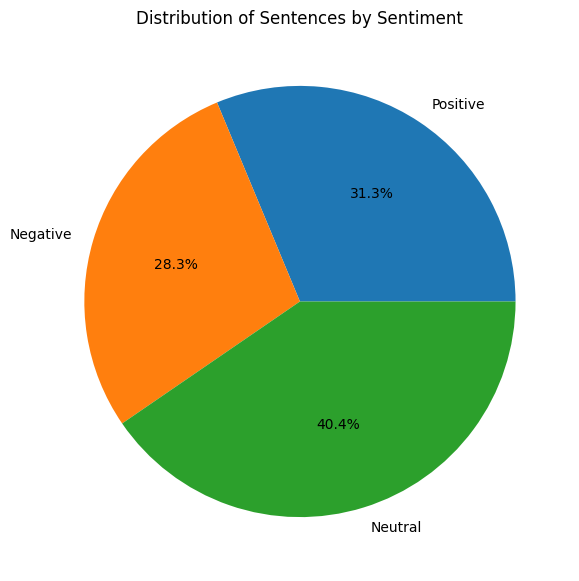

In [143]:
# count the number of positives, negatives and neutral
positives = train_set[train_set['sentiment'] == "positive"]
num_positives = positives.shape[0]
print(f"Number of positie sentences", num_positives)

negatives = train_set[train_set['sentiment'] == 'negative']
num_negatives = negatives.shape[0]
print(f"Number of negative sentences", num_negatives)

neutral = train_set[train_set['sentiment'] == 'neutral']
num_neutral = neutral.shape[0]
print(f"Number of neutral sentences ", num_neutral)
# plot data
sentiment_counts = {'Positive': num_positives, 'Negative': num_negatives, "Neutral": num_neutral}

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%')
plt.title('Distribution of Sentences by Sentiment')
plt.show()


3. Prepare data

In [144]:
# remove punctuation from data
train_set["cleaned_sentence"] = train_set['text'].str.replace('[^\w\s]','', regex = True)

# show example
print(train_set["cleaned_sentence"].loc[0])

# Remove Stop Words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stop words from a text
def remove_stopwords(text):
    return ' '.join([word for word in str(text).split() if word.lower() not in stop_words])

# assuming 'text' is the column containing your sentences
train_set['cleaned_sentence'] = train_set['cleaned_sentence'].apply(remove_stopwords)

# show example
print(train_set["cleaned_sentence"].loc[0])
# Assign each word in every text element a sentiment score using TfidfVectorizer


 Id have responded if I were going
Id responded going


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gabriel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'\nAssign each word in every text element, with a sentiment score (use TfidVectorizer).\nUse a binary classification algorithm (e.g., logistic regression), which you can import from sklearn.\nDivide the data into a training set and testing set, with a ratio of 80:20.\nFit the data set using the model.\nCompute the (accuracy) score of the model.'

4. Train Model

In [ ]:
# Use a binary classification algorithm (e.g., logistic regression), which you can import from sklearn.

# Fit the data set using the model.

# Compute the (accuracy) score of the model.